In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Importation du dataset

In [517]:
cols=['Country','Code','Year', 'Percentage']
df=pd.read_csv('children-per-woman-un.csv', names=cols, header=0, index_col=None)
df.drop(columns=['Code'], inplace=True)
df

,Country,Year,Percentage
0,Australia,1950,3.063
1,Australia,1951,3.063
2,Australia,1952,3.180
3,Australia,1953,3.192
4,Australia,1954,3.192
...,...,...,...
439,United States,2019,1.684
440,United States,2020,1.616
441,United States,2021,1.634
442,United States,2022,1.665


1. Prétraitement des données

- Conversion de Year en datetime

In [518]:
df['Year']=pd.to_datetime(df['Year'], format="%Y")
df

,Country,Year,Percentage
0,Australia,1950-01-01,3.063
1,Australia,1951-01-01,3.063
2,Australia,1952-01-01,3.180
3,Australia,1953-01-01,3.192
4,Australia,1954-01-01,3.192
...,...,...,...
439,United States,2019-01-01,1.684
440,United States,2020-01-01,1.616
441,United States,2021-01-01,1.634
442,United States,2022-01-01,1.665


- Transformation du dataset

In [519]:
df=df.pivot(index="Year", columns="Country", values="Percentage")

- Ne garder que l'année au niveau des dates en index

In [520]:
df.index=df.index.year

- Tableau à traiter

In [521]:
df

Country,Australia,Brazil,China,France,South Africa,United States
Year,,,,,,
1950,3.063,6.122,5.813,2.965,6.032,3.086
1951,3.063,6.115,5.699,2.818,6.063,3.197
1952,3.180,6.102,6.472,2.779,6.081,3.290
1953,3.192,6.093,6.042,2.702,6.094,3.358
1954,3.192,6.087,6.278,2.713,6.109,3.475
...,...,...,...,...,...,...
2019,1.666,1.705,1.496,1.826,2.264,1.684
2020,1.593,1.653,1.236,1.785,2.257,1.616
2021,1.647,1.638,1.117,1.799,2.248,1.634


- Valeurs manquantes

In [522]:
#Pourcentage de valeurs manquantes par colonnes
df.isnull().mean()*100

Country
Australia        0.0
Brazil           0.0
China            0.0
France           0.0
South Africa     0.0
United States    0.0
dtype: float64

- Valeurs abheranttes

In [523]:
df_copy=df.select_dtypes(include=['number']).copy()
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1 #intervalle interquantile
outliers = ((df_copy > Q3 + 1.5 * IQR) | (df_copy < Q1 - 1.5 * IQR)).sum()
for col in df_copy.columns:
    print(f"Variable : {col}")
    print(f"Q1 : {Q1[col]}")
    print(f"Q3 : {Q3[col]}")
    print(f"IQR : {IQR[col]}")
    print(f"Nombre de valeurs extrêmes : {outliers[col]}")
    print("---------------------------")

Variable : Australia
Q1 : 1.81
Q3 : 2.8874999999999997
IQR : 1.0774999999999997
Nombre de valeurs extrêmes : 0
---------------------------
Variable : Brazil
Q1 : 1.9497499999999999
Q3 : 5.134
IQR : 3.1842500000000005
Nombre de valeurs extrêmes : 0
---------------------------
Variable : China
Q1 : 1.6495
Q3 : 5.420249999999999
IQR : 3.7707499999999996
Nombre de valeurs extrêmes : 0
---------------------------
Variable : France
Q1 : 1.81
Q3 : 2.55975
IQR : 0.7497500000000001
Nombre de valeurs extrêmes : 0
---------------------------
Variable : South Africa
Q1 : 2.4605
Q3 : 5.76625
IQR : 3.30575
Nombre de valeurs extrêmes : 0
---------------------------
Variable : United States
Q1 : 1.8490000000000002
Q3 : 2.51325
IQR : 0.66425
Nombre de valeurs extrêmes : 8
---------------------------


2. Analyse exploratoire et visualisation

- Mener une analyse statistique descriptive complète sur la base de données.

In [524]:
df.describe()

Country,Australia,Brazil,China,France,South Africa,United States
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2.270865,3.616635,3.265608,2.127811,4.138662,2.287784
std,0.625577,1.662768,1.948973,0.414268,1.529629,0.662199
min,1.593000,1.619000,0.999000,1.639000,2.216000,1.616000
25%,1.810000,1.949750,1.649500,1.810000,2.460500,1.849000
50%,1.926500,3.296500,2.583000,1.931000,4.380500,1.996500
75%,2.887500,5.134000,5.420250,2.559750,5.766250,2.513250
max,3.542000,6.122000,7.513000,2.965000,6.143000,3.754000


<Axes: xlabel='Country', ylabel='Country'>

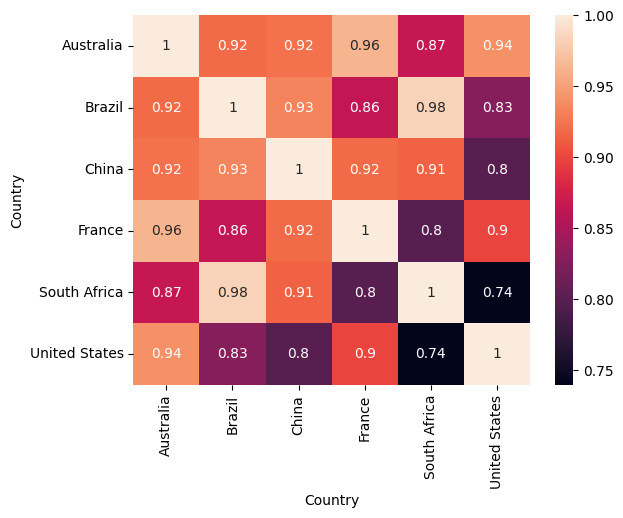

In [525]:
corr=df.corr()
sns.heatmap(corr, annot=True)

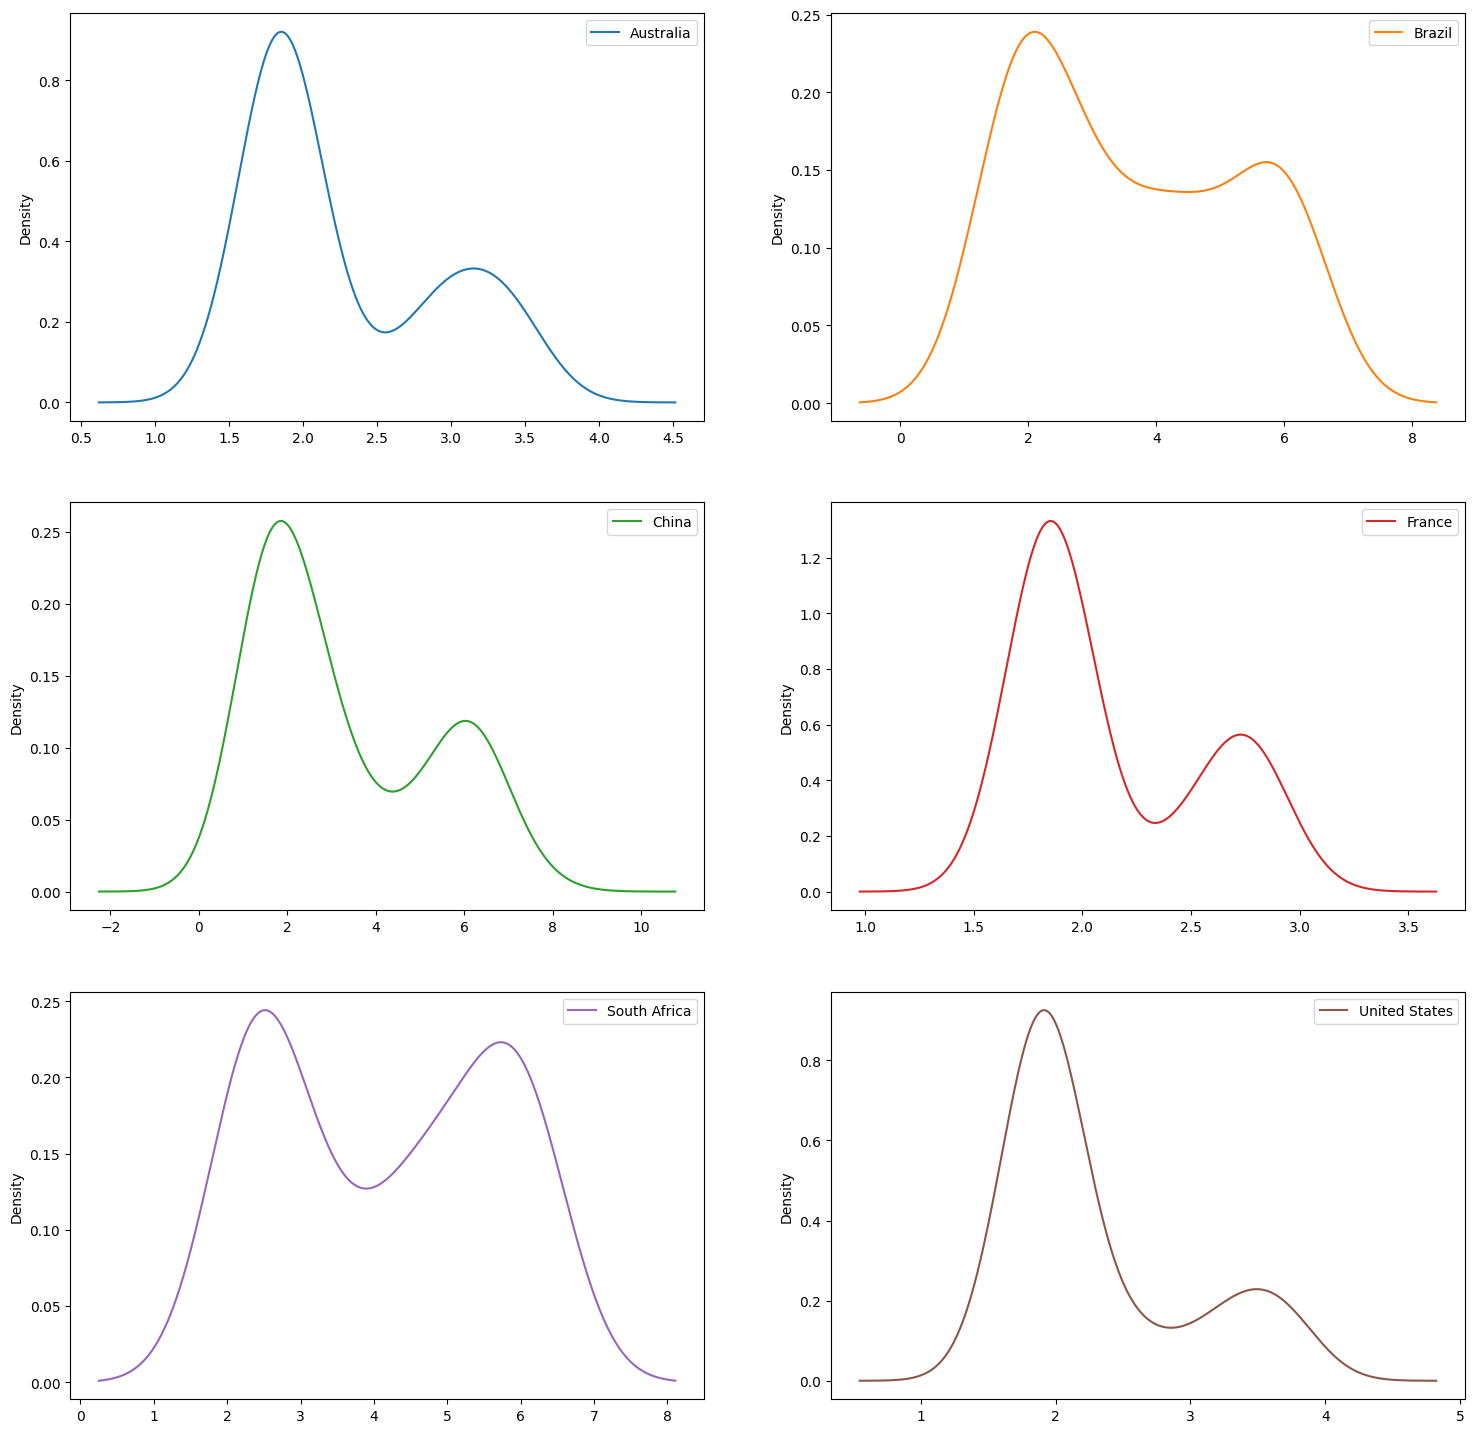

In [526]:
df.plot(kind='density',
        subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(18,18))
plt.show()

- Tracer l’évolution des données au fil du temps

In [527]:
import plotly.express as px
for col in df.columns:
    fig = px.line(df[col], facet_col_wrap=1)
    fig.update_yaxes(matches=None)
    fig.show()

fig = px.line(df, facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.show()


### L'étude temporelle sera faite par rapport à la France. Donc c'est l'étude du taux de fertilité chinois.

-  Tracer les trois composantes de la série temporelle.

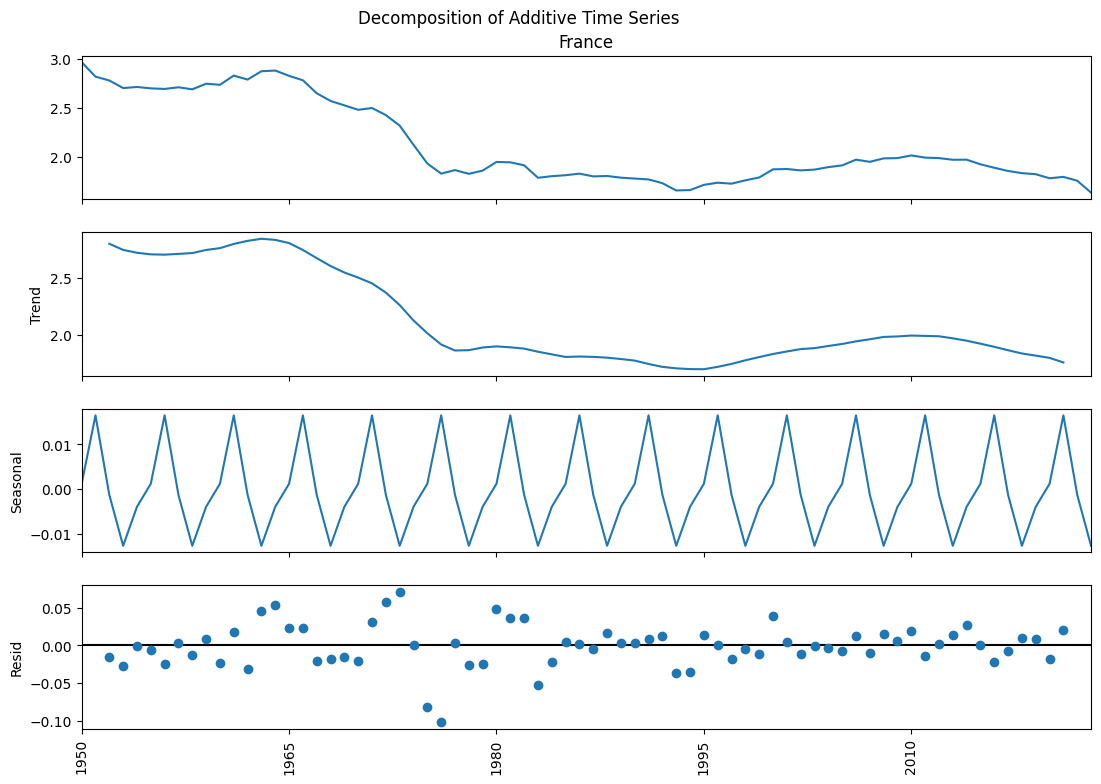

In [528]:
from statsmodels.tsa.seasonal import seasonal_decompose

y=df['France']

decomposition = seasonal_decompose(y, model='additive', period=5)
fig = decomposition.plot()

fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of Additive Time Series')

# par pas de 12
for ax in fig.axes:
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.show()

- Analyser la tendance et la saisonnalité.

La série temporelle originale montre une tendance générale à la baisse sur la période étudiée. La tendance extraite confirme la baisse générale observée dans la série originale.La baisse est particulièrement marquée entre les années 1960 et 1980. 

Le graphique de la saisonnalité révèle un motif régulier et répétitif. La saisonnalité semble avoir une période d'environ 10 ans, ce qui est assez long pour une saisonnalité. Cela peut indiquer des cycles économiques ou des changements de politiques à long terme.

Les résidus semblent être distribués de manière aléatoire autour de zéro, ce qui est un bon signe. Cela indique que le modèle de décomposition additive a bien capturé la tendance et la saisonnalité.


5. Stationnarité et transformation des données 

- Diviser les données en train (80%) et test (20%)

In [529]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

- Etudier la stationnarité de la série.

In [530]:
from statsmodels.tsa.stattools import adfuller
adf=adfuller(train['France'])[1]
print("p-value :", adf)
if adf<0.05:
    print("La variable France est stationnaire")
elif adf>0.05:
    print("La variable France n'est pas stationnaire")

p-value : 0.6417613009363827
La variable France n'est pas stationnaire


- Transformer la série en une qui stationnaire.

In [531]:
train_diff = train.copy()
train_diff['France'] = train_diff['France'].diff()
train_diff.dropna(inplace=True)
adf = adfuller(train_diff['France'])[1]
print("p-value :", adf)

p-value : 3.444891680703502e-05


d=1

6. Construction du modèle

- Trouver les paramètres du modèle ARIMA

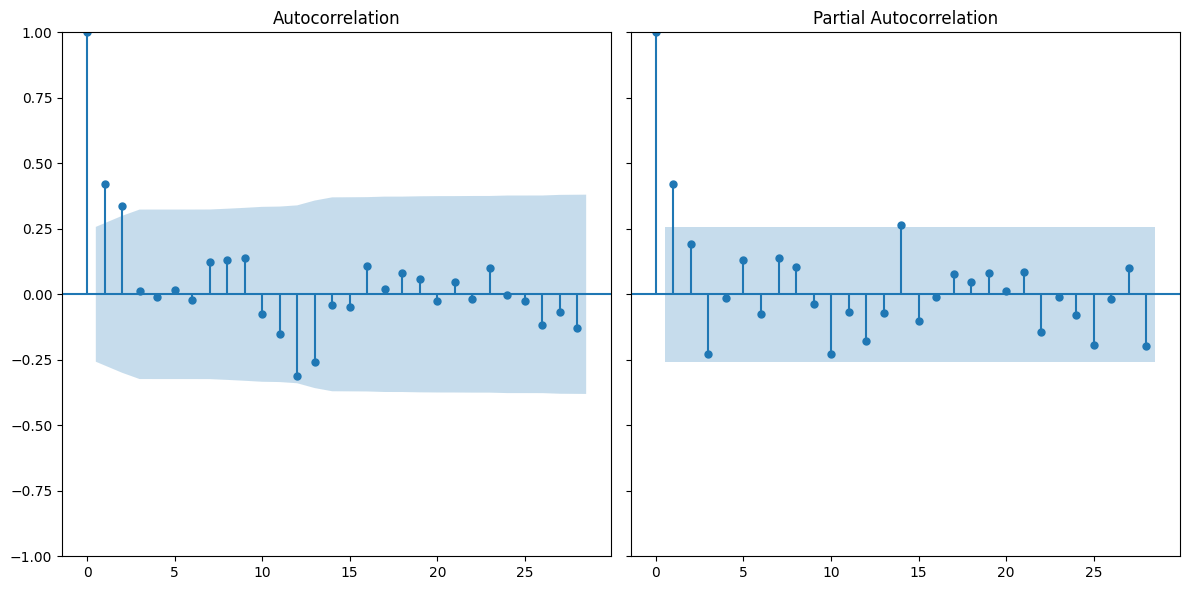

In [532]:
import statsmodels.tsa.api as smt

y=train_diff['France']
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True)
fig.set_figwidth(12)
fig.set_figheight(6)
smt.graphics.plot_acf(y, lags=28, ax=axes[0])
smt.graphics.plot_pacf(y, lags=28, ax=axes[1])
plt.tight_layout()

p=3
d=1
q=2
P=1
D=1
Q=1
s=5

- Appliquer le modèle ARIMA

In [533]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [534]:
model_arima = ARIMA(train['France'], order=(3,1,2))

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



In [543]:
res_arima=model_arima.fit()

c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



7. Evaluation et prédiction

- Comparer les prédictions avec les valeurs réelles

In [536]:
#forecastTest
forecastTest_arima = res_arima.forecast(steps=len(test))

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



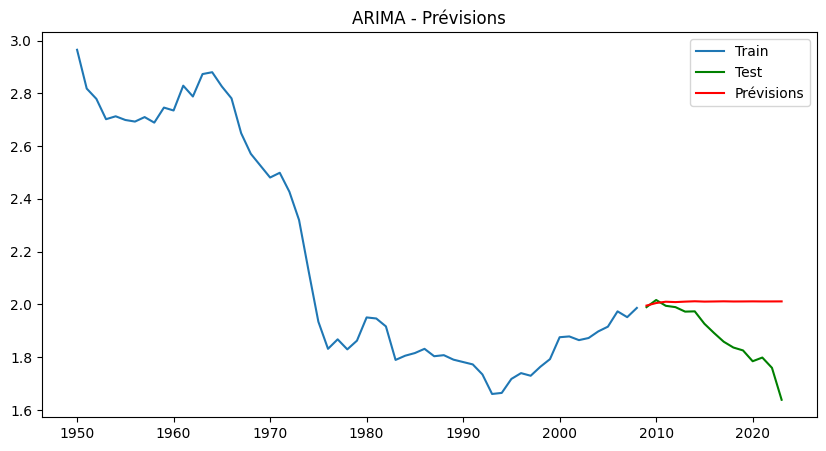

In [537]:
plt.figure(figsize=(10, 5))
plt.plot(train['France'], label="Train")
plt.plot(test['France'], label="Test", color="green")
plt.plot(test.index, forecastTest_arima, label="Prévisions", color="red")
plt.title("ARIMA - Prévisions")
plt.legend()
plt.show()

- Calculer : AIC, BIC, RMSE. Interpréter

In [544]:
print(res_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 France   No. Observations:                   59
Model:                 ARIMA(3, 1, 2)   Log Likelihood                  89.188
Date:                Fri, 14 Mar 2025   AIC                           -166.376
Time:                        13:11:59   BIC                           -154.013
Sample:                             0   HQIC                          -161.560
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2695      0.147     -1.839      0.066      -0.557       0.018
ar.L2         -0.2720      0.160     -1.699      0.089      -0.586       0.042
ar.L3          0.2857      0.162      1.761      0.0

- AIC: -166.376; L'AIC mesure la qualité du modèle. Il est très faible. Donc le modèle est plutôt performant
- BIC: -157.013; Il mesure aussi la qualité. Il est très faible, donc le modèle est bon. 

In [545]:
residuals_arima = res_arima.resid
rmse_arima = np.sqrt(np.mean(residuals_arima**2))
print(f"RMSE: {rmse_arima}")

RMSE: 0.38956953627500546


- Le RMSE est plutot faible. Les prédictions sont donc relativement précises.

- • Visualiser l’écart entre les valeurs réelles et prédites

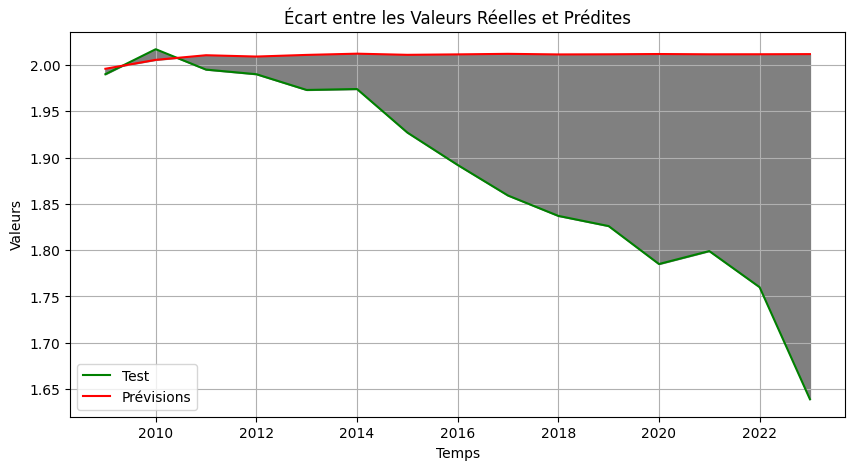

In [554]:
plt.figure(figsize=(10, 5))
plt.plot(test['France'], label="Test", color="green")
plt.plot(test.index, forecastTest_arima, label="Prévisions", color="red")
plt.fill_between(test.index, test['France'], forecastTest_arima, color='gray')
plt.title("Écart entre les Valeurs Réelles et Prédites")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.legend()
plt.grid(True)
plt.show()

- Tester la blancheur et la normalité des résidus.

In [555]:
print(res_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                 France   No. Observations:                   59
Model:                 ARIMA(3, 1, 2)   Log Likelihood                  89.188
Date:                Fri, 14 Mar 2025   AIC                           -166.376
Time:                        13:30:01   BIC                           -154.013
Sample:                             0   HQIC                          -161.560
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2695      0.147     -1.839      0.066      -0.557       0.018
ar.L2         -0.2720      0.160     -1.699      0.089      -0.586       0.042
ar.L3          0.2857      0.162      1.761      0.0

Ljung-Box (L1) (Q):0.29> 0.05

Donc les résidus sont blanc/ pas d'autocorrélation significative

In [558]:
from scipy.stats import shapiro
shapiro_test = shapiro(residuals_arima)
shapiro_test 

ShapiroResult(statistic=0.20826431816430613, pvalue=3.4544107491357215e-16)

pvalue=3.4544107491357215e-16 <0.05 

Donc les résidues ne suivent pas une distribution normale

8. Optimalité du modèle

- Entraîner le modèle auto_arima

In [559]:
import pmdarima

In [560]:
model_auto=pmdarima.auto_arima(train['France'])

c:\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and

In [561]:
print(model_auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(0, 1, 2)   Log Likelihood                  87.316
Date:                Fri, 14 Mar 2025   AIC                           -168.631
Time:                        13:36:59   BIC                           -162.450
Sample:                             0   HQIC                          -166.224
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4701      0.117      4.015      0.000       0.241       0.700
ma.L2          0.5153      0.094      5.478      0.000       0.331       0.700
sigma2         0.0028      0.001      4.491      0.0

Modèle auto_arima :
AIC = -168.631
BIC = -162.450
HQIC = -166.224

Modèle ARIMA :
AIC = -166.376
BIC = -154.013
HQIC = -161.560

Le modèle auto_arima a des valeurs AIC, BIC et HQIC plus faibles, ce qui signifie qu'il s'ajuste mieux au modèle tout en évitant la sur-adaptation.

Test de Ljung-Box (Q) :
auto_arima : Q = 0.32 (p-value = 0.57)
ARIMA : Q = 0.29 (p-value = 0.59)
Les deux modèles montrent des p-values élevées (> 0.05), ce qui signifie que les résidus des deux modèles semblent être indépendants et que les modèles ne souffrent pas de problèmes d'autocorrélation.

Le modèle auto_arima semble plus optimal

9. Modèle SARIMA

In [538]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [539]:
model_sarima = SARIMAX(train["France"], order=(3,1,2), seasonal_order=(1,1,1,5))
res_sarima = model_sarima.fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [540]:
print(res_sarima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                              France   No. Observations:                   59
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 5)   Log Likelihood                  75.639
Date:                             Fri, 14 Mar 2025   AIC                           -135.279
Time:                                     13:05:34   BIC                           -119.516
Sample:                                          0   HQIC                          -129.217
                                              - 59                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1106      0.189      5.891      0.000       0.741       1.480
ar.L2         -0.7472      

In [541]:
#forecastTest
forecastTest_sarima = res_sarima.forecast(steps=len(test))

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



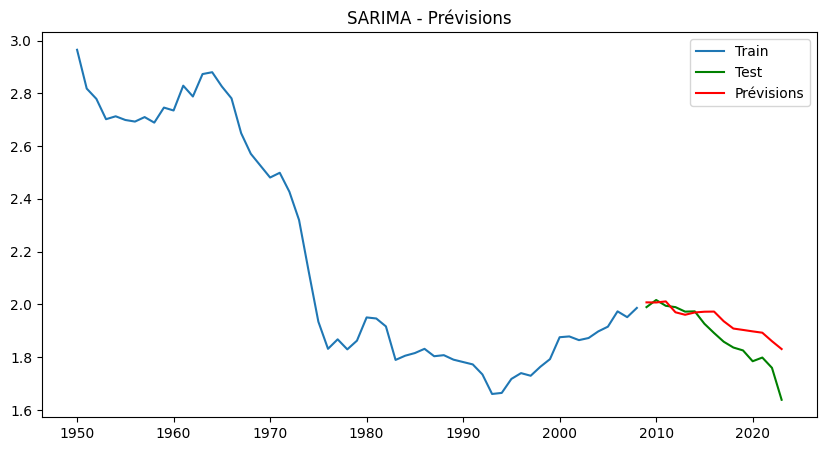

In [542]:
plt.figure(figsize=(10, 5))
plt.plot(train['France'], label="Train")
plt.plot(test['France'], label="Test", color="green")
plt.plot(test.index, forecastTest_sarima, label="Prévisions", color="red")
plt.title("SARIMA - Prévisions")
plt.legend()
plt.show()

In [562]:
residuals_sarima = res_sarima.resid
rmse_sarima = np.sqrt(np.mean(residuals_sarima**2))
print(f"RMSE: {rmse_sarima}")

RMSE: 0.43672754133800606


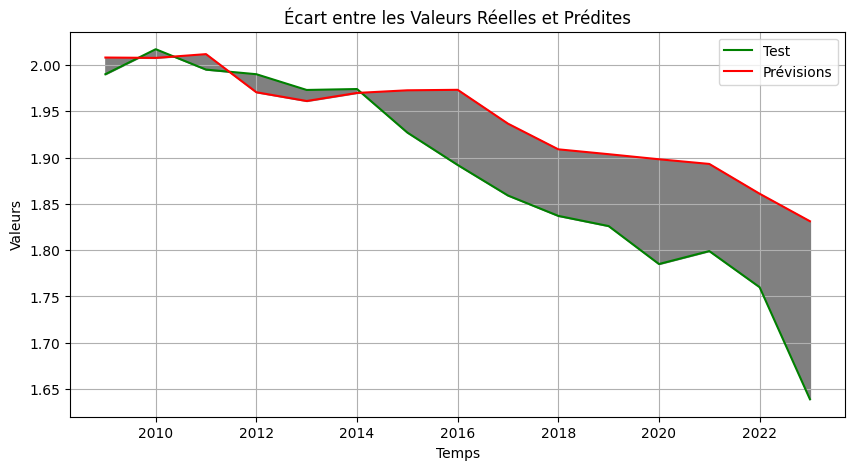

In [563]:
plt.figure(figsize=(10, 5))
plt.plot(test['France'], label="Test", color="green")
plt.plot(test.index, forecastTest_sarima, label="Prévisions", color="red")
plt.fill_between(test.index, test['France'], forecastTest_sarima, color='gray')
plt.title("Écart entre les Valeurs Réelles et Prédites")
plt.xlabel("Temps")
plt.ylabel("Valeurs")
plt.legend()
plt.grid(True)
plt.show()

In [565]:
shapiro_test = shapiro(residuals_sarima)
shapiro_test 

ShapiroResult(statistic=0.3170400987659241, pvalue=4.456678839302777e-15)

pvalue=4.456678839302777e-15 <0.05 Donc les résidus ne sont pas distribués normalement